# Lab 7

## The purpose of this lab is
1. to practice what we have learned so far:
   - Methods for hard and soft clustering
   - K-means algorithm for hard clustering
   - EM algorithm for soft (probabilistic) clustering
2. understand practical aspects of using clustering algorithms
3. prepare for the electronic test
5. to help you to make progress with Python tutorial and your DM & ML portfolio

## Before lab

- Watch recordings, and run the Python code accompanying tutorial P4. Clustering (Week 7).
- Make sure you can run this code using your chosen data set. In case you have any issues, contact your lab tutor and ask for help.
- Use k-means clustering to find clusters in your data set. Evaluate the accuracy of this clustering, visualize the clusters.
- (optional for BSc but recommended for higher marks, mandatory for MSc) try different clustering algorithms for hard and soft clustering, such as EM, GMM, hierarchical clustering or any other algorithms of your choice. Compare their performance on your data set.
- Try also to vary the number of clusters manually. How does it affect the accuracy of clustering?
- (optional for BSc but recommended for higher marks, mandatory for MSc) Research some of the existing algorithms to compute the optimal number of clusters. For example, look up: Elbow method, the silhouette method, cluster validity and similarity measures. Can these algorithms help you to find the optimal number of clusters for your data set?

### You might find these references useful
- Using dimensionality reduction to visualize clustering, we recommend you look into ”PCA” and ”TSNE” links to an external site. Check also Chapter 8 ”Dimensionality Reduction”, [ Hands-On Machine Learning, Aurelien Geron ] & accompanying code.
- For alternative clustering algorithms you could check Chapter 9 ”Unsupervised Learning techniques”, Hands-On Machine Learning, by Aurelien Geron & accompanying code

## During lab

- Put all your results in a suitable form: it can be a table or a series of graphs, that visualise the variations of performance between different clustering algorithms and different numbers of clusters. (Lab 5 gave an example of how machine learning experiments may be assembled into a comparative table. You can use it as a starting point. But let it not limit your creativity.)
- Using that table (or graphs), make conclusions: What did these clustering algorithms reveal about your data set? Compare performance of clustering algorithms with the results of Bayesian classification on the same data set. Is there difference in performance?
- Make conclusions about the optimal number of clusters for your data set.
- (optional for BSc but recommended for higher marks, mandatory for MSc) Using your experiments as a source, explain all pros and cons of using different (hard and soft) clustering algorithms on the given data set.
- The tutors will mark: quality of your code, completeness of your tables/graphs that summarise the results of your group experiments and your analysis of the tables/graphs, i.e. what sort of conclusions you make, how you refer to the theoretical knowledge of clustering algorithms

# Imports 

In [1]:
# conda env create -f env.yaml 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import os

In [2]:
np.random.seed(0)
os.environ["OMP_NUM_THREADS"] = "5"

In [3]:
df3 = pd.read_csv("Data/data3.csv")
df4 = pd.read_csv("Data/data4.csv")

# Statistical Summary and Correlation

In [4]:
df3.describe()

,failures,higher,studytime,Medu,Fedu,Dalc,age,reason_reputation,school,address,internet,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,0.264368,0.914751,1.970307,2.603448,2.387931,1.494253,16.726054,0.237548,0.260536,0.272989,0.792146,11.341954
std,0.656142,0.279386,0.834353,1.124907,1.099938,0.911714,1.239975,0.425785,0.439138,0.445708,0.405967,3.864796
min,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,2.000000,1.000000,1.000000,16.000000,0.000000,0.000000,0.000000,1.000000,10.000000
50%,0.000000,1.000000,2.000000,3.000000,2.000000,1.000000,17.000000,0.000000,0.000000,0.000000,1.000000,11.000000
75%,0.000000,1.000000,2.000000,4.000000,3.000000,2.000000,18.000000,0.000000,1.000000,1.000000,1.000000,14.000000
max,3.000000,1.000000,4.000000,4.000000,4.000000,5.000000,22.000000,1.000000,1.000000,1.000000,1.000000,20.000000


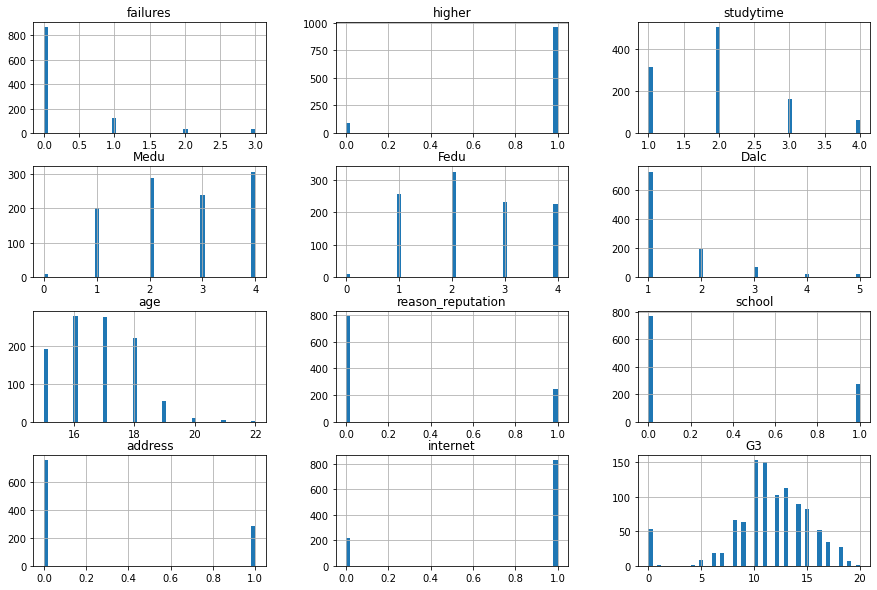

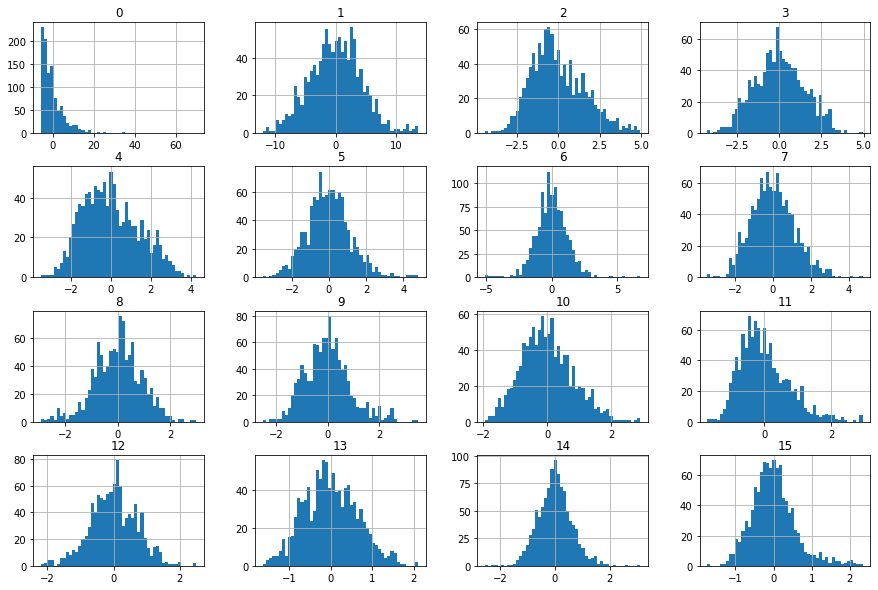

In [5]:
df3.hist(bins=50, figsize=(15,10))
plt.show()
df4.hist(bins=50, figsize=(15,10))
plt.show()

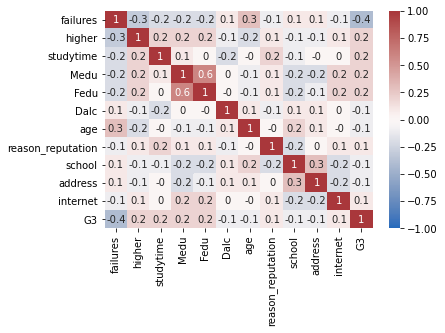

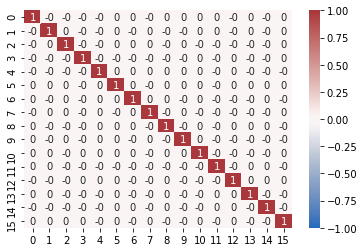

In [6]:
corr_matrix = df3.corr().round(1)

# Resizing the heatmap
# fig, ax = plt.subplots(figsize=(16,11))

sns.heatmap(corr_matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

corr_matrix = df4.corr().round(1)

# Resizing the heatmap
# fig, ax = plt.subplots(figsize=(16,11))

sns.heatmap(corr_matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

# Modelling and Testing

In [7]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture # GMM
from sklearn.cluster import AgglomerativeClustering # Hieracrchical
from sklearn.preprocessing import MinMaxScaler

# K-Means Clustering
## Experimentation

In [8]:
k = 3
k_means = KMeans(n_clusters=k, random_state=0)
predicted = k_means.fit_predict(X=df4)
display(predicted)
display(k_means.cluster_centers_)

array([0, 0, 1, ..., 0, 0, 0])

array([[-1.19817006e+00,  3.43133938e+00,  1.74673310e-02,
        -4.14558013e-02,  7.24022065e-04, -1.32801251e-01,
         8.71891747e-02,  5.42911267e-03,  2.61818537e-02,
        -1.66005008e-02, -1.36984048e-02,  5.08161251e-02,
         1.01678754e-02,  9.64302895e-03, -1.37778095e-02,
        -2.57776172e-02],
       [ 1.16541415e+01, -1.99651137e-01,  1.36284294e-01,
        -5.11421234e-02, -7.02110591e-02,  1.29585872e-01,
         7.33027794e-05,  6.17779051e-02, -5.23510996e-02,
         3.95819160e-02,  8.23891679e-02, -7.81857818e-02,
        -3.33465786e-02,  2.00302517e-02,  5.45298364e-02,
         5.97627724e-02],
       [-2.59383209e+00, -3.52953691e+00, -6.33170728e-02,
         6.03309259e-02,  2.24317846e-02,  9.63522188e-02,
        -9.13841668e-02, -2.60938225e-02, -1.01429231e-02,
         4.32084859e-03, -1.28591415e-02, -2.74225038e-02,
         3.59979999e-04, -1.67202274e-02, -3.57410909e-03,
         7.27130280e-03]])

In [9]:
k = 2
k_means = KMeans(n_clusters=k, random_state=0)
predicted = k_means.fit_predict(X=df3)
display(predicted)
display(k_means.cluster_centers_)
# Expected penultimate 4 to be heavily split due to them being binary encoded.
# However this is now the case, instead the values tended towards the binary index with most instances.
# In general the results don't really tell us much.


array([1, 1, 1, ..., 1, 1, 0])

array([[ 0.05963303,  0.97247706,  2.06574924,  2.78134557,  2.55810398,
         1.40061162, 16.56269113,  0.2706422 ,  0.19877676,  0.2324159 ,
         0.82568807, 13.52446483],
       [ 0.60769231,  0.81794872,  1.81025641,  2.30512821,  2.1025641 ,
         1.65128205, 17.        ,  0.18205128,  0.36410256,  0.34102564,
         0.73589744,  7.68205128]])

In [10]:
k = 10
k_means = KMeans(n_clusters=k, random_state=0)
predicted = k_means.fit_predict(X=df3.iloc[:,:-1])
display(predicted)
display(k_means.cluster_centers_)
# Seems to split some features better.
# Need to be careful! Becuase k is larger than the posible range of values for these features its possible that some of these results
# are interpreting the discrete feature space as continuous clustors.

array([3, 2, 9, ..., 2, 6, 6])

array([[ 0.15294118,  0.76470588,  1.29411765,  1.42352941,  1.96470588,
         1.35294118, 17.2       ,  0.09411765,  0.57647059,  0.56470588,
         0.64705882],
       [ 0.06321839,  0.98275862,  1.87931034,  3.64942529,  3.62068966,
         1.27011494, 15.53448276,  0.26436782,  0.10344828,  0.16666667,
         0.89655172],
       [ 0.10071942,  0.9352518 ,  2.49640288,  1.86330935,  1.51798561,
         1.14388489, 17.77697842,  0.25899281,  0.1942446 ,  0.28057554,
         0.75539568],
       [ 0.13559322,  0.99435028,  2.08474576,  3.56497175,  3.46327684,
         1.24293785, 17.59887006,  0.32768362,  0.18644068,  0.18644068,
         0.89830508],
       [ 0.07462687,  0.98507463,  3.62686567,  2.71641791,  1.98507463,
         1.19402985, 15.65671642,  0.47761194,  0.14925373,  0.23880597,
         0.8358209 ],
       [ 0.17948718,  0.97435897,  1.8974359 ,  3.56410256,  3.61538462,
         3.69230769, 16.82051282,  0.28205128,  0.23076923,  0.28205128,
         0.923

## Chosen data

In [11]:
def plot_data(X):
    sns.kdeplot(x=X[:, 0], y=X[:, 1], cmap="Blues",shade=True)
    # plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]

    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=10, linewidths=20,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    if show_centroids:
        if isinstance(clusterer, KMeans):
            plot_data(X)
            plot_centroids(clusterer.cluster_centers_)
            plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
        elif isinstance(clusterer, GaussianMixture):
            plot_centroids(clusterer.means_)

    if show_xlabels:
        plt.xlabel("age", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

    # plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
    #             cmap="Pastel2")
    

In [12]:
df = df3[["age", "studytime"]]
# df = df3[["age", "G3"]]


scaler = MinMaxScaler()
df = scaler.fit_transform(df)

for k in range(2,7):
    k_means = KMeans(n_clusters=k, random_state=0)
    k_means.fit(X=df)

    plot_decision_boundaries(k_means, df)
    plt.show()

AttributeError: 'NoneType' object has no attribute 'split'

The visualization makes clear that the discrete features do affect the k-means algorithm.
Maybe duplicating samples with added noise/spatial-jitter could smooth the bumps caused by the discrete data or it could be interpolated into continuous data.

# Other methods

## Gaussian Mixture Model Clustering

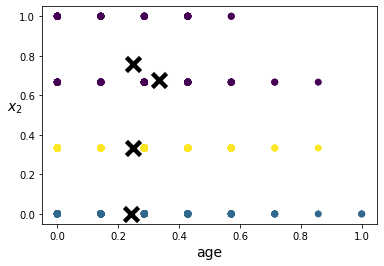

In [13]:
k=4
clusterer = GaussianMixture(n_components=k, random_state=0)
clusterer.fit(X=df)

plot_decision_boundaries(clusterer, df)
plt.scatter(x=df[:,0], y=df[:,1], c=clusterer.predict(df), alpha=1)
plt.show()

## Hieracrchical Clustering

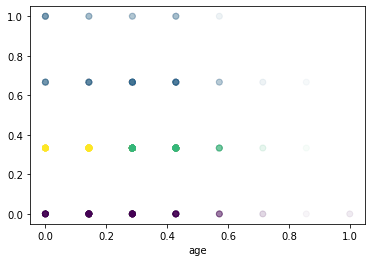

In [14]:
clusterer = AgglomerativeClustering(n_clusters=k)
plt.scatter(x=df[:,0], y=df[:,1], c=clusterer.fit_predict(X=df), alpha=0.04)
plt.xlabel("age")
plt.show()

# PCA with n = 2

In [63]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
df = pd.read_csv("Data/processed_data.csv")
y = df.pop("G3")
df_pca = pca.fit_transform(df)
df_pca

array([[ 2.56255429,  7.47905223],
       [ 0.58779179,  8.7601376 ],
       [ 6.15181326,  4.70358245],
       ...,
       [ 1.44645695, -0.45744594],
       [ 1.89950133,  1.75966626],
       [-0.22157593,  1.25873252]])

In [64]:
k_means_pca = KMeans(n_clusters=2, random_state=0)
k_means_pca.fit(df_pca)

KMeans(n_clusters=2, random_state=0)

In [65]:
plot_decision_boundaries(k_means_pca, df_pca)

AttributeError: 'NoneType' object has no attribute 'split'

# Graph of Results

In [66]:

results = pd.DataFrame(
    [
    ["K-Means","Good"],
    ["GaussianMixtureModel",""],
    ["Hierarchical",""],
    ],
    columns=["Clustering Method", "Result"],
    )
display(results)

,Clustering Method,Result
0,K-Means,Good
1,GaussianMixtureModel,
2,Hierarchical,
